In [18]:
from ipywidgets import widgets, Layout
import os
import warnings
from plotly.subplots import make_subplots
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'jupyterlab'
pio.templates.default = "plotly_dark"
warnings.simplefilter(action='ignore')
import itertools
plt.style.use('fivethirtyeight')

In [22]:
rain = pd.read_csv(r'../data/processedfiles/rainfall-by-region.csv')
regions = list(rain.columns.values)[5:]
years = list(rain['year'].unique())
monsoon_list = [i for i in range(150, 281)]
rain_monsoon = rain[rain['day-number'].isin(monsoon_list)]

In [23]:
rain.isnull().sum()

year                  0
day-number            0
date                  0
month                 0
day-of-month          0
ajmer              1127
alwar               765
banswara            370
baran             12418
barmer             5511
bharatpur           824
bhilwara            367
bikaner            2195
bundi               399
chittorgarh         733
churu               429
dausa              4480
dholpur           10227
dungarpur           369
hanumangarh       13514
jaipur              370
jaisalmer           370
jalore              370
jhunjhunu           370
jodhpur             369
karoli            14975
kota               7306
nagaur              370
pali                401
pratapgarh        18627
rajsamand         12814
sawai madhopur     5849
sikar                35
sirohi                4
ganganagar          370
tonk               1466
udaipur               5
aw                    1
bshw                  1
cwq                 368
bwhw                369
sub humid       

## ARIMA ON AJMER 

In [42]:
rain[rain['ajmer'].isnull()]

,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
1461,1961,1,1961-01-01,1,1,NaN,1.19,0.0,NaN,0.0,...,0.00,0.68,0.10,0.0,0.36,0.0,0.30,0.0,0.00,0.85
1462,1961,2,1961-01-02,1,2,NaN,3.24,0.0,NaN,0.0,...,0.00,1.71,0.82,0.0,0.07,0.0,1.12,0.0,0.00,0.00
1463,1961,3,1961-01-03,1,3,NaN,0.00,0.0,NaN,0.0,...,0.56,0.11,0.00,0.0,0.53,0.2,0.11,0.0,0.26,0.76
1464,1961,4,1961-01-04,1,4,NaN,0.00,0.0,NaN,0.0,...,0.00,0.27,0.00,0.0,0.38,0.0,0.19,0.0,0.00,0.29
1465,1961,5,1961-01-05,1,5,NaN,0.00,0.0,NaN,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9399,1982,269,1982-09-26,9,26,NaN,NaN,0.0,NaN,NaN,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
9400,1982,270,1982-09-27,9,27,NaN,NaN,0.0,NaN,NaN,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
9401,1982,271,1982-09-28,9,28,NaN,NaN,0.0,NaN,NaN,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
9402,1982,272,1982-09-29,9,29,NaN,NaN,0.0,NaN,NaN,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00


In [43]:
ajmer=rain.iloc[:,[5]]

In [44]:
ajmer.head(25)

,ajmer
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
5,0.00
6,0.08
7,16.22
8,6.71
9,0.00


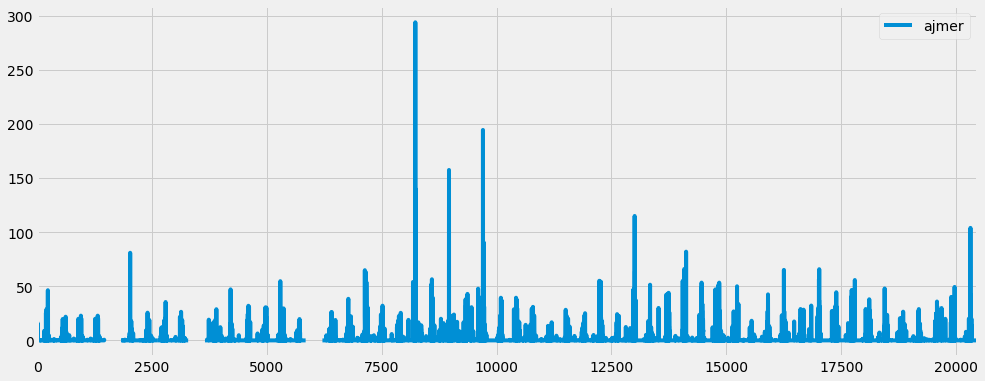

In [45]:
ajmer.plot(figsize=(15, 6))
plt.show()

In [46]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [47]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ajmer,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:105354.90046230119
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:104601.40459099229
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:114772.63229002482
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:103766.82833790072
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:104420.27230369831
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:103871.32483336637
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:109494.55634013584
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:103358.29444199013
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:100751.11887661797
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:100420.14886163773
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:112009.6380099657
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:99740.17179325441
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:100379.05352706053
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:100074.27270250692
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:106472.16452222172
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:99601.7438455657
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:104603.91470707642
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:104535.17552393

In [48]:
mod = sm.tsa.statespace.SARIMAX(ajmer,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3782      0.002    152.652      0.000       0.373       0.383
ma.L1         -1.0540      0.001   -742.773      0.000      -1.057      -1.051
ar.S.L12      -0.0028      0.003     -1.006      0.315      -0.008       0.003
ma.S.L12      -1.0000      0.101     -9.931      0.000      -1.197      -0.803
sigma2         6.3598      0.644      9.869      0.000       5.097       7.623


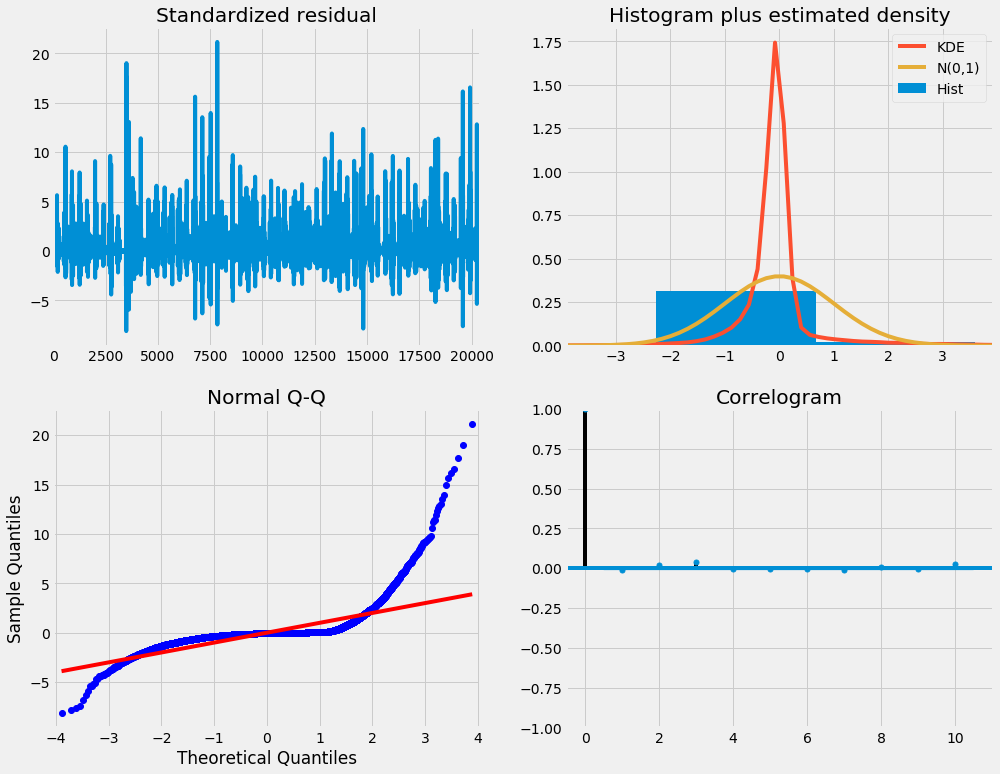

In [49]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

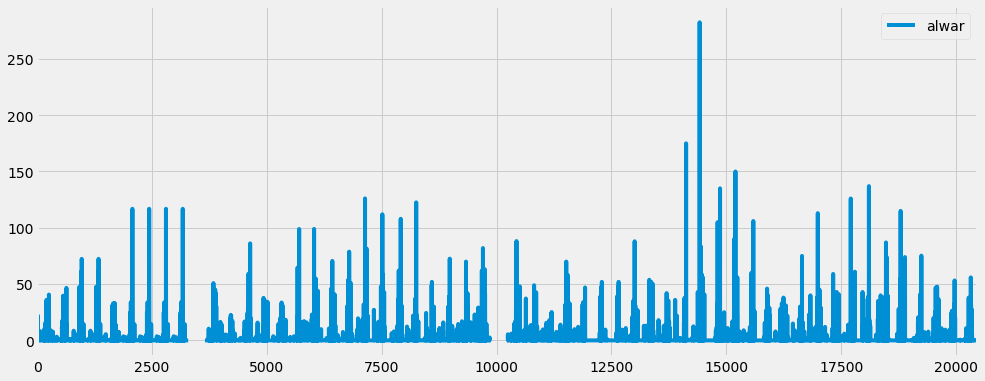

In [96]:
rain[rain['alwar'].isnull()]
alwar=rain.iloc[:,[6]]
alwar.head(25)
alwar.plot(figsize=(15, 6))
plt.show()

In [55]:
rain[rain['bhilwara'].isnull()]

,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,1966,362,1966-12-28,12,28,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3649,1966,363,1966-12-29,12,29,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3650,1966,364,1966-12-30,12,30,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3651,1966,365,1966-12-31,12,31,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0


In [56]:
rain[rain['bikaner'].isnull()]

,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,1977,362,1977-12-28,12,28,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
7667,1977,363,1977-12-29,12,29,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
7668,1977,364,1977-12-30,12,30,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
7669,1977,365,1977-12-31,12,31,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [57]:
rain[rain['bundi'].isnull()]

,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8304,1979,270,1979-09-27,9,27,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0
8305,1979,271,1979-09-28,9,28,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0
8306,1979,272,1979-09-29,9,29,0.0,0.0,20.0,NaN,0.0,...,0.0,0.0,2.24,0.0,0.03,0.0,0.01,8.22,0.0,0.0
8307,1979,273,1979-09-30,9,30,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.24,0.0,0.00,0.0,0.14,0.00,0.0,0.0


In [58]:
rain[rain['chittorgarh'].isnull()]

,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.00
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.00
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.00
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16796,2002,361,2002-12-27,12,27,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
16797,2002,362,2002-12-28,12,28,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
16798,2002,363,2002-12-29,12,29,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
16799,2002,364,2002-12-30,12,30,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.09,0.0,0.03,0.00,0.00,0.00


In [59]:
rain[rain['churu'].isnull()]

,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9399,1982,269,1982-09-26,9,26,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9400,1982,270,1982-09-27,9,27,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9401,1982,271,1982-09-28,9,28,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9402,1982,272,1982-09-29,9,29,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
rain[rain['dausa'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2556,1964,1,1964-01-01,1,1,0.0,0.0,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
2557,1964,2,1964-01-02,1,2,0.0,0.0,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
2558,1964,3,1964-01-03,1,3,0.0,0.0,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
2559,1964,4,1964-01-04,1,4,0.0,0.0,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
2560,1964,5,1964-01-05,1,5,0.0,0.0,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12413,1990,361,1990-12-27,12,27,0.0,0.0,0.0,NaN,NaN,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
12414,1990,362,1990-12-28,12,28,0.0,0.0,0.0,NaN,NaN,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
12415,1990,363,1990-12-29,12,29,0.0,0.0,0.0,NaN,NaN,...,1.4,0.00,0.0,0.0,0.00,2.1,0.00,0.0,0.0,1.75
12416,1990,364,1990-12-30,12,30,0.0,0.0,0.0,NaN,NaN,...,0.0,0.96,0.0,0.0,0.15,0.0,0.45,0.0,0.0,0.00


In [61]:
rain[rain['dholpur'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
0,1957,1,1957-01-01,1,1,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,1957,2,1957-01-02,1,2,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,1957,3,1957-01-03,1,3,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,1957,4,1957-01-04,1,4,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,1957,5,1957-01-05,1,5,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10222,1984,362,1984-12-27,12,27,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
10223,1984,363,1984-12-28,12,28,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
10224,1984,364,1984-12-29,12,29,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
10225,1984,365,1984-12-30,12,30,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [62]:
rain[rain['dungarpur'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,1966,364,1966-12-30,12,30,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3651,1966,365,1966-12-31,12,31,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN
5112,1970,365,1970-12-31,12,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN


In [63]:
rain[rain['hanumangarh'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
0,1957,1,1957-01-01,1,1,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1957,2,1957-01-02,1,2,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1957,3,1957-01-03,1,3,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1957,4,1957-01-04,1,4,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1957,5,1957-01-05,1,5,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13509,1993,361,1993-12-27,12,27,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13510,1993,362,1993-12-28,12,28,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13511,1993,363,1993-12-29,12,29,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13512,1993,364,1993-12-30,12,30,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
rain[rain['jaipur'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1966,365,1966-12-31,12,31,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
4076,1968,60,1968-02-29,2,29,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,0.0,0.0,0.00,0.0,NaN,0.0
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN
5112,1970,365,1970-12-31,12,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN


In [65]:
rain[rain['jaisalmer'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1966,365,1966-12-31,12,31,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
4076,1968,60,1968-02-29,2,29,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,0.0,0.0,0.00,0.0,NaN,0.0
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN
5112,1970,365,1970-12-31,12,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN


In [66]:
rain[rain['jalore'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1966,365,1966-12-31,12,31,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
4076,1968,60,1968-02-29,2,29,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,0.0,0.0,0.00,0.0,NaN,0.0
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN
5112,1970,365,1970-12-31,12,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN


In [67]:
rain[rain['jhunjhunu'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1966,365,1966-12-31,12,31,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
4076,1968,60,1968-02-29,2,29,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,0.0,0.0,0.00,0.0,NaN,0.0
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN
5112,1970,365,1970-12-31,12,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN


In [68]:
rain[rain['jodhpur'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,1966,364,1966-12-30,12,30,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3651,1966,365,1966-12-31,12,31,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
4076,1968,60,1968-02-29,2,29,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [69]:
rain[rain['karoli'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
0,1957,1,1957-01-01,1,1,0.0,0.0,0.0,NaN,0.0,...,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
1,1957,2,1957-01-02,1,2,0.0,0.0,0.0,NaN,0.0,...,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
2,1957,3,1957-01-03,1,3,0.0,0.0,0.0,NaN,0.0,...,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
3,1957,4,1957-01-04,1,4,0.0,0.0,0.0,NaN,0.0,...,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
4,1957,5,1957-01-05,1,5,0.0,0.0,0.0,NaN,0.0,...,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14970,1997,361,1997-12-27,12,27,0.0,0.0,0.0,0.0,NaN,...,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
14971,1997,362,1997-12-28,12,28,0.0,0.0,0.0,0.0,NaN,...,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
14972,1997,363,1997-12-29,12,29,0.0,0.0,0.0,0.0,NaN,...,0.58,0.00,0.0,0.0,0.35,0.0,0.00,0.0,0.0,0.69
14973,1997,364,1997-12-30,12,30,0.0,5.0,0.0,0.0,NaN,...,0.11,0.09,0.0,0.0,0.61,0.0,0.04,0.0,0.0,1.19


In [70]:
rain[rain['kota'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
0,1957,1,1957-01-01,1,1,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1957,2,1957-01-02,1,2,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1957,3,1957-01-03,1,3,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1957,4,1957-01-04,1,4,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1957,5,1957-01-05,1,5,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20449,2012,362,2012-12-27,12,27,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20450,2012,363,2012-12-28,12,28,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20451,2012,364,2012-12-29,12,29,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20452,2012,365,2012-12-30,12,30,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
rain[rain['nagaur'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1966,365,1966-12-31,12,31,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
4076,1968,60,1968-02-29,2,29,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,0.0,0.0,0.00,0.0,NaN,0.0
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN
5112,1970,365,1970-12-31,12,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN


In [72]:
rain[rain['pali'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9399,1982,269,1982-09-26,9,26,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9400,1982,270,1982-09-27,9,27,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9401,1982,271,1982-09-28,9,28,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9402,1982,272,1982-09-29,9,29,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
rain[rain['pratapgarh'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
0,1957,1,1957-01-01,1,1,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1957,2,1957-01-02,1,2,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1957,3,1957-01-03,1,3,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1957,4,1957-01-04,1,4,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1957,5,1957-01-05,1,5,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18622,2007,361,2007-12-27,12,27,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18623,2007,362,2007-12-28,12,28,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18624,2007,363,2007-12-29,12,29,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18625,2007,364,2007-12-30,12,30,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
rain[rain['rajsamand'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
0,1957,1,1957-01-01,1,1,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1957,2,1957-01-02,1,2,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1957,3,1957-01-03,1,3,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1957,4,1957-01-04,1,4,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1957,5,1957-01-05,1,5,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15700,1999,361,1999-12-27,12,27,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15701,1999,362,1999-12-28,12,28,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15702,1999,363,1999-12-29,12,29,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15703,1999,364,1999-12-30,12,30,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
rain[rain['sawai madhopur'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
1461,1961,1,1961-01-01,1,1,NaN,1.19,0.0,NaN,0.0,...,0.00,0.68,0.10,0.0,0.36,0.0,0.30,0.0,0.00,0.85
1462,1961,2,1961-01-02,1,2,NaN,3.24,0.0,NaN,0.0,...,0.00,1.71,0.82,0.0,0.07,0.0,1.12,0.0,0.00,0.00
1463,1961,3,1961-01-03,1,3,NaN,0.00,0.0,NaN,0.0,...,0.56,0.11,0.00,0.0,0.53,0.2,0.11,0.0,0.26,0.76
1464,1961,4,1961-01-04,1,4,NaN,0.00,0.0,NaN,0.0,...,0.00,0.27,0.00,0.0,0.38,0.0,0.19,0.0,0.00,0.29
1465,1961,5,1961-01-05,1,5,NaN,0.00,0.0,NaN,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15335,1998,361,1998-12-27,12,27,0.0,0.00,0.0,0.0,NaN,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
15336,1998,362,1998-12-28,12,28,0.0,0.00,0.0,0.0,NaN,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
15337,1998,363,1998-12-29,12,29,0.0,0.00,0.0,0.0,NaN,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
15338,1998,364,1998-12-30,12,30,0.0,0.00,0.0,0.0,NaN,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00


In [76]:
rain[rain['sikar'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4076,1968,60,1968-02-29,2,29,0.0,0.0,NaN,NaN,NaN,...,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,NaN,0.00
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN
5112,1970,365,1970-12-31,12,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN
8459,1980,60,1980-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,8.50,1.57,NaN,1.00,NaN,3.28,4.00,NaN,NaN
9282,1982,152,1982-06-01,6,1,16.8,0.0,0.0,NaN,0.0,...,0.00,1.31,1.80,0.00,0.12,0.00,1.63,0.00,0.00,0.00
9283,1982,153,1982-06-02,6,2,0.0,0.0,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9284,1982,154,1982-06-03,6,3,0.0,0.0,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9285,1982,155,1982-06-04,6,4,0.0,0.0,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9286,1982,156,1982-06-05,6,5,0.0,0.0,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [77]:
rain[rain['sirohi'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4076,1968,60,1968-02-29,2,29,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
5112,1970,365,1970-12-31,12,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [78]:
rain[rain['ganganagar'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.00
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.00
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.00
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1966,365,1966-12-31,12,31,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.00
4990,1970,243,1970-08-31,8,31,30.27,24.75,19.68,NaN,1.2,...,13.35,40.75,15.97,24.42,15.76,7.0,28.34,14.88,1.67,6.03
5051,1970,304,1970-10-31,10,31,0.00,NaN,NaN,NaN,0.0,...,NaN,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN
5112,1970,365,1970-12-31,12,31,0.00,NaN,NaN,NaN,0.0,...,NaN,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN


In [79]:
rain[rain['tonk'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18988,2008,362,2008-12-27,12,27,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18989,2008,363,2008-12-28,12,28,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18990,2008,364,2008-12-29,12,29,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18991,2008,365,2008-12-30,12,30,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
rain[rain['udaipur'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4076,1968,60,1968-02-29,2,29,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,0.0,0.0,0.00,0.0,NaN,0.0
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN
5112,1970,365,1970-12-31,12,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN
8459,1980,60,1980-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,8.5,1.57,NaN,1.0,NaN,3.28,4.0,NaN,NaN


In [81]:
rain[rain['aw'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
rain[rain['bshw'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
rain[rain['cwq'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,1966,363,1966-12-29,12,29,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3650,1966,364,1966-12-30,12,30,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
3651,1966,365,1966-12-31,12,31,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [84]:
rain[rain['bwhw'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,1966,364,1966-12-30,12,30,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3651,1966,365,1966-12-31,12,31,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN
5112,1970,365,1970-12-31,12,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN


In [85]:
rain[rain['sub humid'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
rain[rain['humid'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
rain[rain['very humid'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1966,365,1966-12-31,12,31,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
4076,1968,60,1968-02-29,2,29,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,0.0,0.0,0.00,0.0,NaN,0.0
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN
5112,1970,365,1970-12-31,12,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN


In [88]:
rain[rain['semi arid'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
rain[rain['arid'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,1966,364,1966-12-30,12,30,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3651,1966,365,1966-12-31,12,31,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN
5112,1970,365,1970-12-31,12,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN


In [90]:
rain[rain['daw'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
rain[rain['caw'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
5112,1970,365,1970-12-31,12,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [92]:
rain[rain['ead'].isnull()]


,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,1966,1,1966-01-01,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3288,1966,2,1966-01-02,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3289,1966,3,1966-01-03,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3290,1966,4,1966-01-04,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,1966,363,1966-12-29,12,29,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3650,1966,364,1966-12-30,12,30,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
3651,1966,365,1966-12-31,12,31,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,0.0,NaN,0.0
4076,1968,60,1968-02-29,2,29,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,0.0,0.0,0.00,0.0,NaN,0.0


In [93]:
rain[rain['dbw'].isnull()]

,year,day-number,date,month,day-of-month,ajmer,alwar,banswara,baran,barmer,...,bwhw,sub humid,humid,very humid,semi arid,arid,daw,caw,ead,dbw
2615,1964,60,1964-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5051,1970,304,1970-10-31,10,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN
5112,1970,365,1970-12-31,12,31,0.0,NaN,NaN,NaN,0.0,...,NaN,0.0,0.00,NaN,0.0,NaN,0.00,NaN,0.0,NaN
8459,1980,60,1980-02-29,2,29,NaN,NaN,NaN,NaN,NaN,...,NaN,8.5,1.57,NaN,1.0,NaN,3.28,4.0,NaN,NaN
